In [1]:
import cv2
from IPython.display import Image, display
from ipywidgets import widgets
import numpy as np

In [20]:
def imshow(img):
    """画像を Notebook 上に表示する。
    """
    encoded = cv2.imencode(".png", img)[1]
    display(Image(encoded, width=400))


def adjust(img, alpha=1.0, beta=0.0):
    # 積和演算を行う。
    dst = alpha * img + beta
    # [0, 255] でクリップし、uint8 型にする。
    return np.clip(dst, 0, 255).astype(np.uint8)


def gamma_correction(img, gamma):
    # テーブルを作成する。
    table = (np.arange(256) / 255) ** gamma * 255
    # [0, 255] でクリップし、uint8 型にする。
    table = np.clip(table, 0, 255).astype(np.uint8)

    return cv2.LUT(img, table)


def process(img, alpha, beta, gamma):
    """明るさ、コントラストを調整し、結果を表示する。
    """
    dst = adjust(img, alpha, beta)
    dst = gamma_correction(dst, gamma)
    imshow(dst)

    return dst

In [3]:
param_widgets = {}

# パラメータ「ゲイン」を設定するスライダー
param_widgets["alpha"] = widgets.FloatSlider(
    min=0.0, max=3.0, step=0.1, value=1.8, description="alpha: "
)

# パラメータ「バイアス」を設定するスライダー
param_widgets["beta"] = widgets.FloatSlider(
    min=-100.0, max=100.0, step=10.0, value=-50.0, description="beta: "
)

# パラメータ「ガンマ」を設定するスライダー
param_widgets["gamma"] = widgets.FloatSlider(
    min=0.0, max=3.0, step=0.1, value=1.5, description="gamma: "
)

for x in param_widgets.values():
    x.layout.width = "400px"

In [4]:
# 画像を読み込む。
video_path = "/raid6/surgery-video/02/001/11.mp4"
cap = cv2.VideoCapture(video_path)
img = cap.read()[1]

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))

cl_r = clahe.apply(img[:,:,2])
cl_g = clahe.apply(img[:,:,1])
cl_b = clahe.apply(img[:,:,0])
cl = cv2.merge((cl_b, cl_g, cl_r))

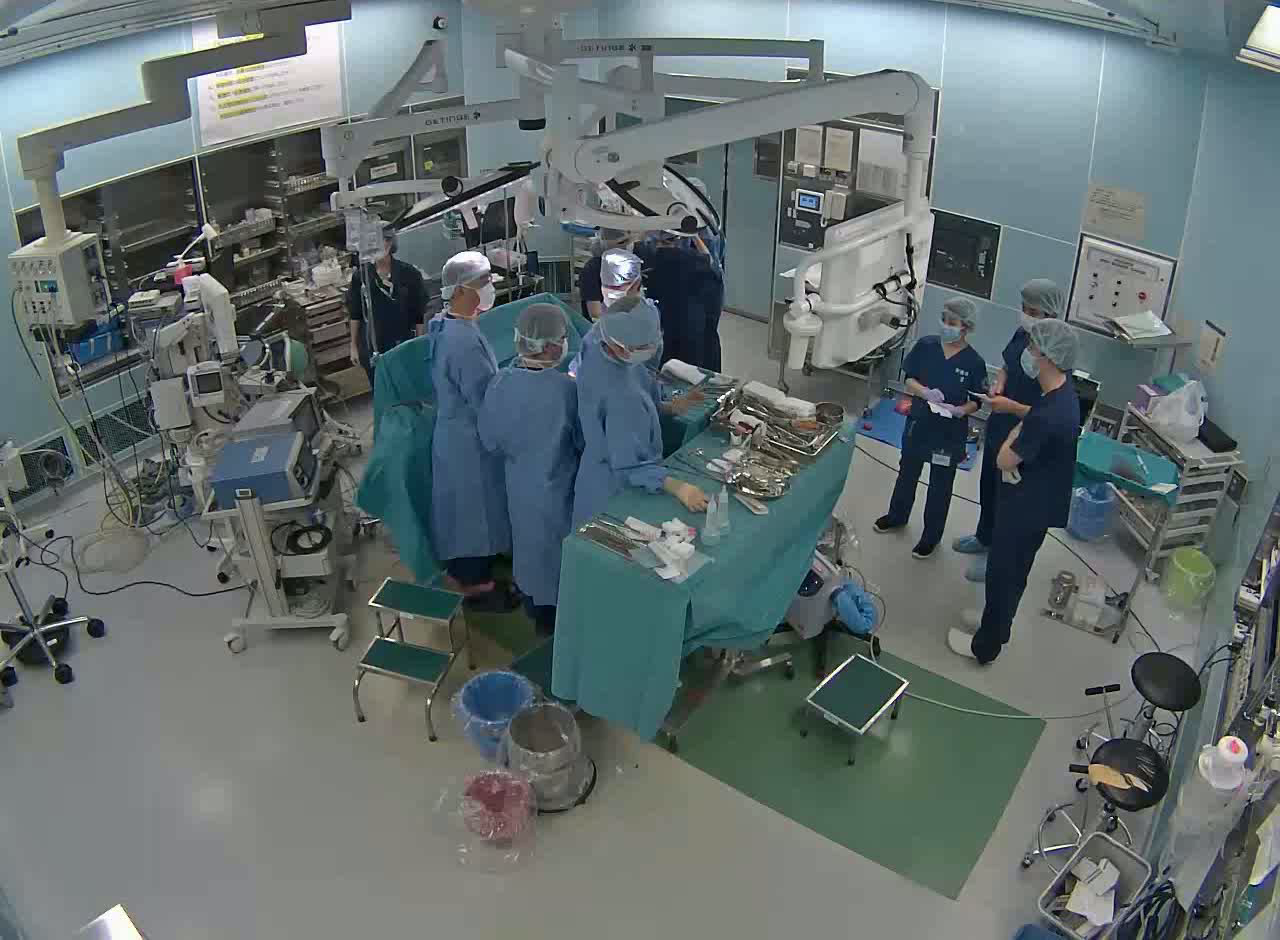

In [5]:
imshow(img)

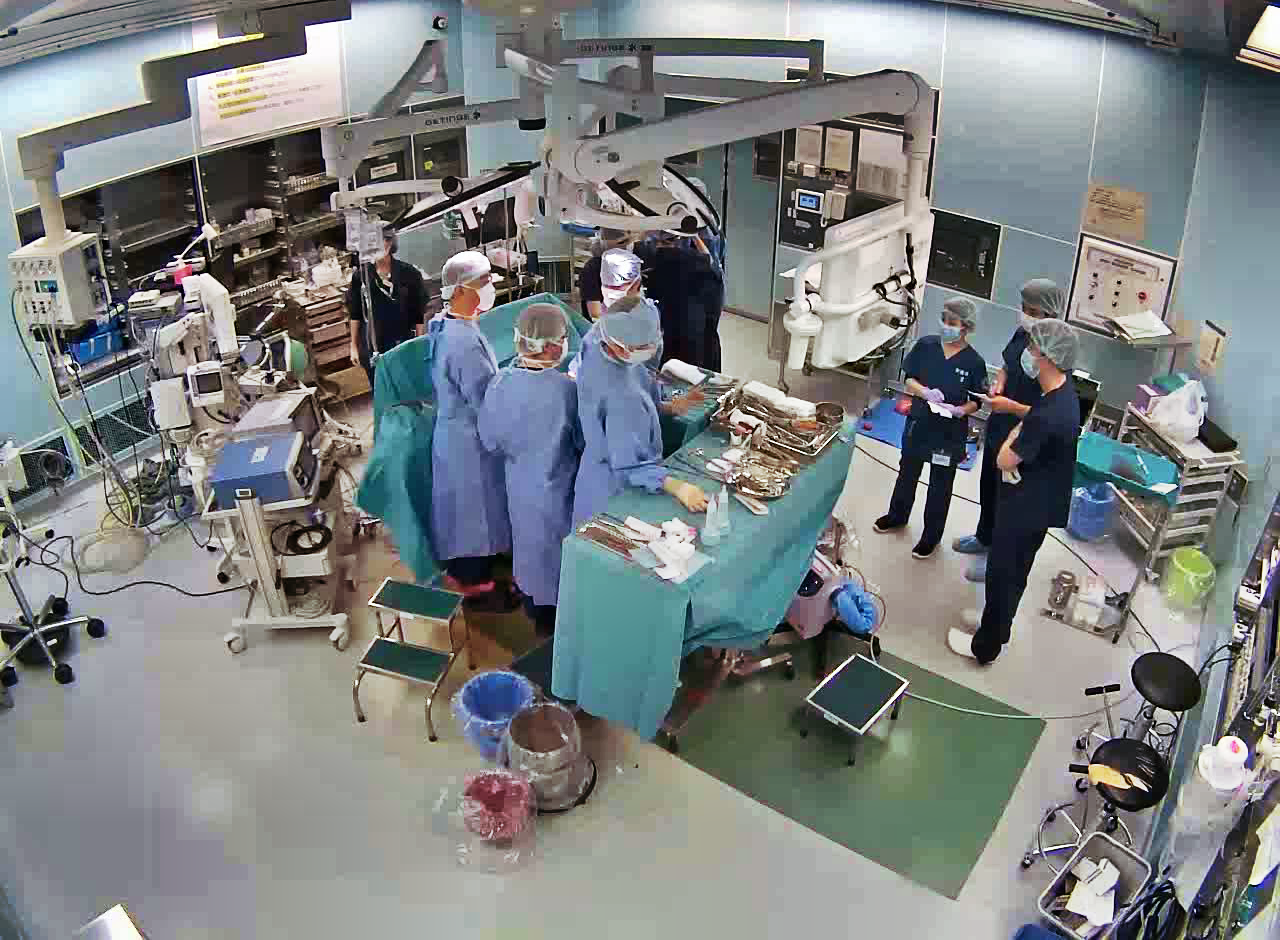

In [27]:
imshow(cl)

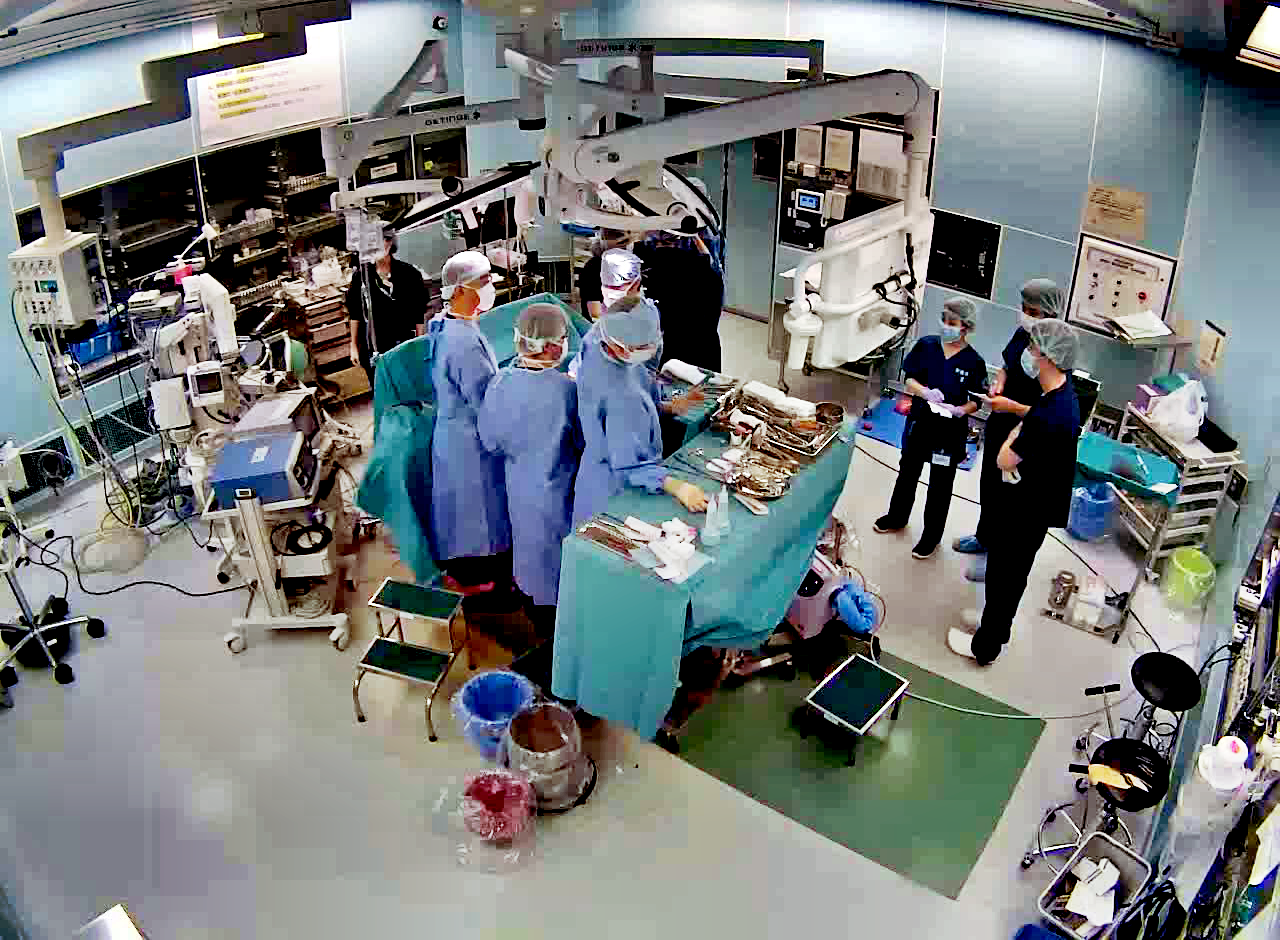

In [34]:
dst = process(cl, alpha=1.3, beta=-70, gamma=0.7)

In [35]:
cv2.imwrite("img.jpg", img)
cv2.imwrite("cl.jpg", cl)
cv2.imwrite("dst.jpg", dst)

True

In [25]:
# ウィジェットを表示する。
widgets.interactive(process, img=widgets.fixed(cl), **param_widgets)

interactive(children=(FloatSlider(value=1.4, description='alpha: ', layout=Layout(width='400px'), max=3.0), Fl…